In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from secml.array import CArray
import pandas as pd
import itertools
import numpy as np

In [2]:
# set graphical settings
sns.set_style("whitegrid")
sns.set_context("paper")

In [3]:
SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [12]:
classifiers = ['ridge']
classifier_names = ["RC"]

# Backdoor slope

clf name and params: 1 [-1] [1.00000000e-04 4.64158883e-04 2.15443469e-03 1.00000000e-02
 4.64158883e-02 2.15443469e-01 1.00000000e+00 4.64158883e+00
 2.15443469e+01 1.00000000e+02]
6-0


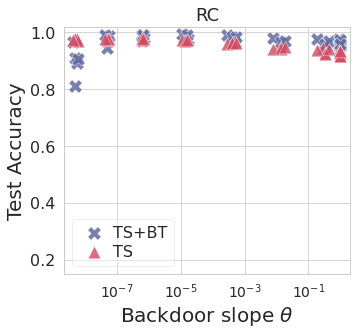

FileNotFoundError: [Errno 2] No such file or directory: './binary/cifar/ridge_pair2-5_ttypebadnet_tsize16.csv'

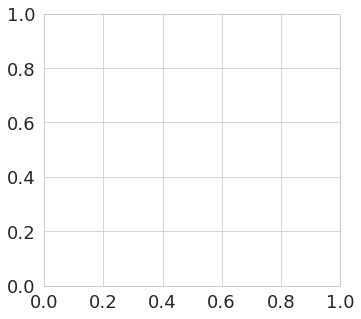

In [17]:
trigger = {
    'mnist': ('badnet',6),
    'cifar': ('badnet', 16),
    'imagenette': ('invisible10', 'None'),

}
dataset = "cifar"

ttype, tsize = trigger[dataset]

s = 180
i = 0

if dataset == "mnist":
    pairs = ['7-1', '3-0', '5-2']
else: 
    pairs = ['6-0', '2-5', '0-9']

markers = ['X', '^', 'P']
markers_rbf = ["^", "v","P", "X"]



backdoor_palette = sns.color_palette("ch:s=.25,rot=-.25")
clean_palette = sns.color_palette("flare")

for pair in pairs:
    #fig, axs = plt.subplots(1, 1, figsize=(18, 4.3))
    #axs = axs.flatten()
    #for i, classifier in enumerate(classifiers): 
    for clf_i, classifier in enumerate(classifiers): 
        clf_name = classifier_names[clf_i]
        i = 0
        fig, axs = plt.subplots(1, 1, figsize=(5.3, 5))
        axs = [axs]
        
        
        root = "./binary/{}/".format(dataset)
        backdoor = pd.read_csv(root + "{}_pair{}_ttype{}_tsize{}.csv".format(classifier, pair,ttype,tsize))

        binfluence = backdoor.copy()
        print("clf name and params:",len(classifier_names), binfluence['gamma'].unique(), binfluence['c'].unique())

        axs[i].set_xscale('log')
        
        x_name = 'avg_I_poison_train_triggered_test_clf' 

        binfluence[x_name] = binfluence[x_name]
        binfluence = binfluence[binfluence[x_name] < 0]


        binfluence[x_name] = binfluence[x_name]
        binfluence[x_name] = -2/np.pi *np.arctan(binfluence[x_name])
        

        backdoor_color = backdoor_palette[3]
        clean_color = clean_palette[2]
        
        if "svm-rbf" in classifier:
            gamma_text = ['\\gamma_0', "\\gamma_1"]

            for g, gamma in enumerate(binfluence['gamma'].unique()[[0, 2]]):
                binfluence_g = binfluence[binfluence['gamma'] == gamma]

                ax = sns.scatterplot(data=binfluence_g, x=x_name, y="clfp_acc", alpha=1,
                                     s = s, ax=axs[i], color=clean_palette[2*g], 
                                     label="TS ${}$".format(gamma_text[g]),
                                    marker=markers_rbf[g], linewidth=0.5)
                
            for g, gamma in enumerate(binfluence['gamma'].unique()[[0, 2]]):
                binfluence_g = binfluence[binfluence['gamma'] == gamma]

                ax = sns.scatterplot(data=binfluence_g, x=x_name, y="clfp_acc_on_backdoor", alpha=0.9,
                     ax=axs[i], s= s +(1-g)*20, color=backdoor_palette[2*g+2], 
                     label="TS+BT ${}$".format(gamma_text[g]),
                    marker=markers_rbf[g+2], linewidth=0.5)


            ax.legend(loc='best', fancybox=True, framealpha=0.2, handletextpad=0.1,labelspacing=.5, fontsize=16)
            
        else:
            
            ax = sns.scatterplot(data=binfluence, x=x_name, y="clfp_acc_on_backdoor", alpha=0.85,
                                 ax=axs[i], s= s, color=backdoor_color, label="TS+BT",
                                marker=markers[0], linewidth=0.5)

            ax = sns.scatterplot(data=binfluence, x=x_name, y="clfp_acc", alpha=0.8,
                                 s = s-20, ax=axs[i], color=clean_color, label="TS",
                                marker=markers[1], linewidth=0.5)

            ax.legend(loc="best", handletextpad=0.1,labelspacing=.5, fontsize=16)

        v1 = np.log(binfluence[x_name])
        v2 = binfluence['clfp_acc']

        title = clf_name
        axs[i].set_title(title, fontsize=18)
        axs[i].set_xlabel("Backdoor slope $\\theta$", fontsize=20)
        axs[i].set_ylabel("Test Accuracy", fontsize=20)
        #axs[i].set_ylim(0., 1.01)
        axs[i].tick_params(axis="y", labelsize=16)
        axs[i].tick_params(axis="x", labelsize=14)
        axs[i].set_xlim(binfluence[x_name].min()/2, binfluence[x_name].max()*2)
        axs[i].set_ylim(0.15,1.02)
        plt.legend(
            framealpha=0.4,
            handletextpad=0.2,
            labelspacing=0.25,
            fontsize=16,
        )
        fig.tight_layout()
                
        plt.savefig(root+'fig/' + "{}_pair{}_ttype{}_tsize{}.pdf".format(classifier, pair,ttype,tsize), bbox_inches='tight', dpi=600)
        plt.show()

In [52]:
len(binfluence['c'].unique())

10

In [75]:
binfluence['gamma'].unique()
#binfluence['c'].unique()

array([1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
       1.00000000e-03])

### RBF kernel

In [ ]:
dataset = "imagenette"

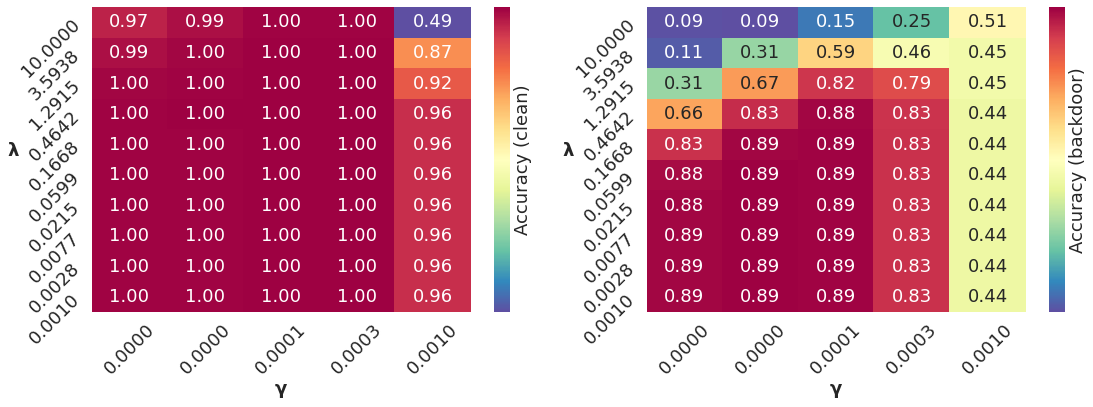

In [7]:
if dataset == "mnist":
    pair = '7-1'
else: 
    pair = '6-0'


classifier = 'svm-rbf'

root = "./binary/{}/".format(dataset)
backdoor = pd.read_csv(root + "{}_pair{}_ttype{}_tsize{}.csv".format(classifier, pair,ttype,tsize))


backdoor['lambda'] = 1/backdoor['c']
c_ids = backdoor["lambda"].unique()
g_ids = backdoor["gamma"].unique()

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
d = backdoor.loc[backdoor['lambda'].isin(c_ids) & backdoor['gamma'].isin(g_ids)]


heat = d.groupby(["lambda", "gamma"]).mean().reset_index().pivot("lambda", "gamma", "clfp_acc")
ax = sns.heatmap(heat, 
                  ax = axs[0],
                 annot=True,
                 cmap=sns.color_palette("Spectral_r", as_cmap=True), 
                 cbar=True,
                 cbar_kws={"ticks": [-1], #[-40, -20, 0, 25, 50, 75, 100, 125, 150],
                           'label': 'Accuracy (clean)'},
                 fmt='.2f')
tick = ax.set_xticklabels(['{:.4f}'.format(float(t.get_text())) for t in ax.get_xticklabels()], rotation=45)
tick = ax.set_yticklabels(['{:.4f}'.format(float(t.get_text())) for t in ax.get_yticklabels()], rotation=45)
axs[0].set_xlabel("$\mathbf{\\gamma}$")
axs[0].set_ylabel("$\mathbf{\\lambda}$", rotation=0)
ax.invert_yaxis()

heat = d.groupby(["lambda", "gamma"]).mean().reset_index().pivot("lambda", "gamma", "clfp_acc_on_backdoor")
ax = sns.heatmap(heat,
                 ax = axs[1],
                 annot=True,
                 cmap=sns.color_palette("Spectral_r", as_cmap=True), 
                 cbar=True,
                 cbar_kws={"ticks": [-1], #[-40, -20, 0, 25, 50, 75, 100, 125, 150],
                           'label': 'Accuracy (backdoor)'},
                 fmt='.2f')
tick = ax.set_xticklabels(['{:.4f}'.format(float(t.get_text())) for t in ax.get_xticklabels()], rotation=45)
tick = ax.set_yticklabels(['{:.4f}'.format(float(t.get_text())) for t in ax.get_yticklabels()], rotation=45)
axs[1].set_xlabel("$\mathbf{\\gamma}$")
axs[1].set_ylabel("$\mathbf{\\lambda}$", rotation=0)
ax.invert_yaxis()

plt.tight_layout()
plt.savefig(root+'fig/backdoor_matrix.pdf', bbox_inches='tight', dpi=600)
plt.show()
